# DIMENSIONALITY REDUCTION

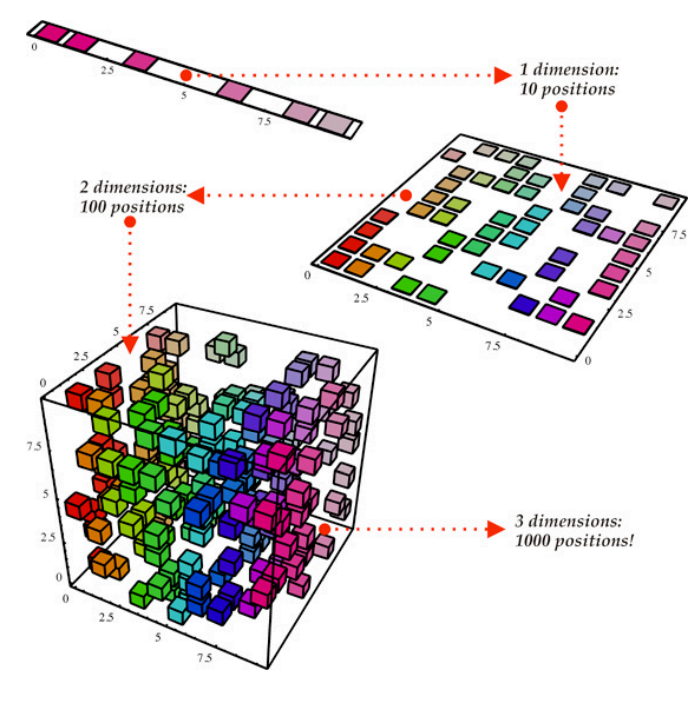

Dimensionality reduction is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data. 

## Why so much care about dimension ?

Well, We care because the curse of dimensionality demands that we do. The curse of dimensionality refers to all the problems that arise when working with data in the higher dimensions, that did not exist in the lower dimensions.
As the number of features increase, the number of samples also increases proportionally. The more features we have, the more number of samples we will need to have all combinations of feature values well represented in our sample. This graph is speaking actually more than me :)

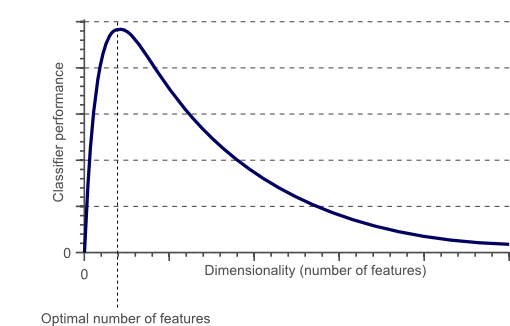

Well there are many dataset in which you might have worked or will be working like **IRIS Dataset**, **Titanic dataset**, **MNIST**, and many more. I have choosed here to go with MNIST dataset which will really make understanding more easy. ;)

## What is MNIST dataset ??

Well actually its a dataset having numbers from 0 to 9 distributed all our main usually in thi dataset is to predict the number from 0 to 9. But lets first understand our data, directly working on data and applying models to that is not a very big cup of tea. Besides, Understanding data and making something useful out of that is what all Data Science.

So lets get started !!!!!!!!!

In [ ]:
import pandas as pd # for creating dataframe from numerical array 
import numpy as np # for handling all the mathematics 
import seaborn as sns # for the better visualization which will help you learn how dimensionality reduction happens
import matplotlib.pyplot as plt
from sklearn import datasets # for the import of mniset dataset by another way
from sklearn import manifold# to perform the t-SNE

%matplotlib inline

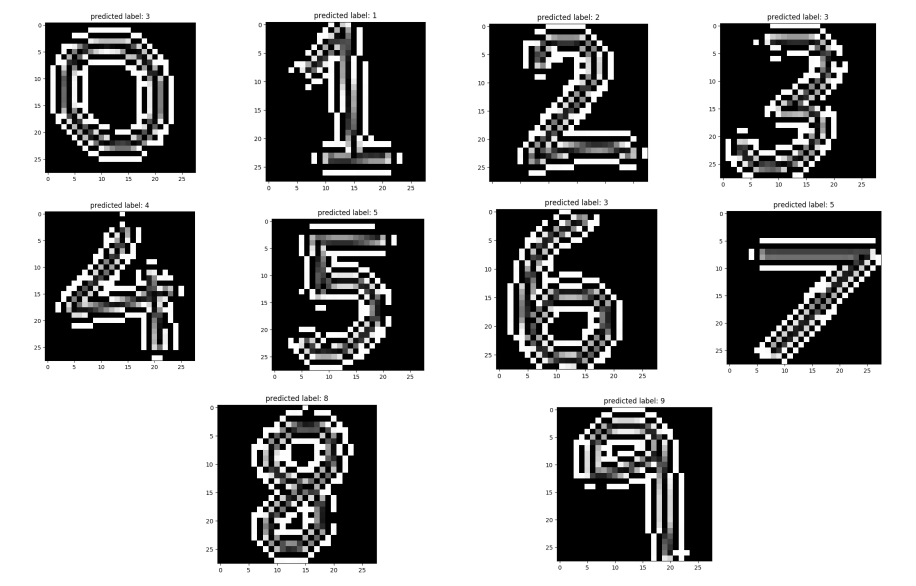

In [ ]:
df = pd.read_csv("../input/mnist-in-csv/mnist_train.csv")
df

In [ ]:
# removing the label from the dataset as we are not gonna ever doing dimension reduction on our label
df1 = df.iloc[:,1:]
df1

## Why fit_transform() on Train and transform() on Test ??
We use fit_transform() on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data.

In [ ]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df1)
df_std

# Steps of PCA
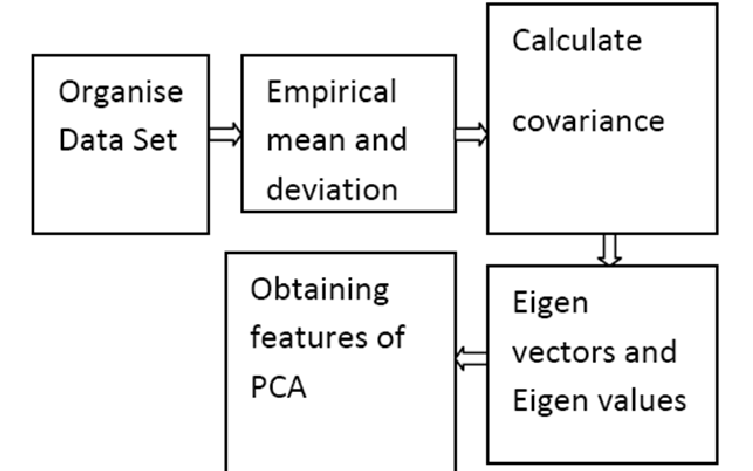

Till Now, we have completed the first 2 steps and we are on the third step to find the covariance matrix which is very easy by our libary numpy and that is just done below by taking the transpose of scaled df.

In [ ]:
df_cov_matrix = np.cov(df_std.T)
df_cov_matrix

Now comes the 4th step where in we are calculating the eign values and eign vector for the principal component analysis, this is the most important step of all, which includes the heart of PCA.

## What are Eigenvectors?

We know that vectors have both magnitude and direction when plotted on an XY (2-dim) plane. As required for this article, linear transformation of a vector, is the multiplication of a vector with a matrix that changes the basis of the vector and also its direction.
When a vector is plotted, it’s direction is along its span. Now, there are some special vectors, which when transformed linearly, their directions don’t change, that is, they don’t get knocked off their span (the line passing through it’s origin and tip). Instead they’re either squished or stretched.
This leads us to Eigenvalues.

## What are Eigenvalues?

They’re simply the constants that increase or decrease the Eigenvectors along their span when transformed linearly.

# A detail on Eigen vector and Values.. :)

Suppose we have plotted a scatter plot of random variables, and a line of best fit is drawn between these points. This line of best fit, shows the direction of maximum variance in the dataset. The Eigenvector is the direction of that line, while the eigenvalue is a number that tells us how the data set is spread out on the line which is an Eigenvector.
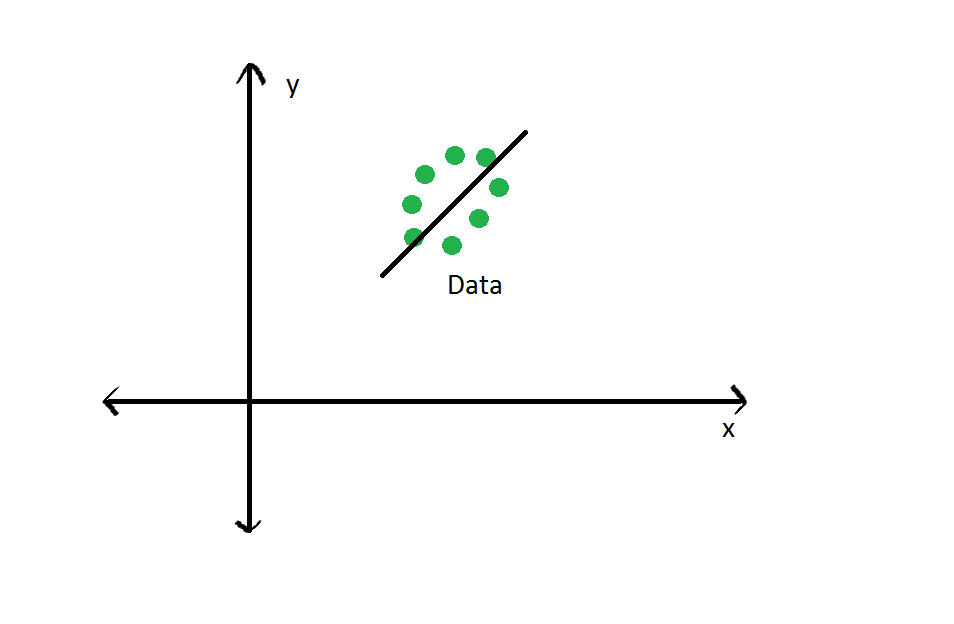



The main principal component, depicted by the black line, is the first Eigenvector. The second Eigenvector will be perpendicular or orthogonal to the first one. The reason the two Eigenvectors are orthogonal to each other is because the Eigenvectors should be able to span the whole x-y area. Naturally, a line perpendicular to the black line will be our new Y axis, the other principal component.

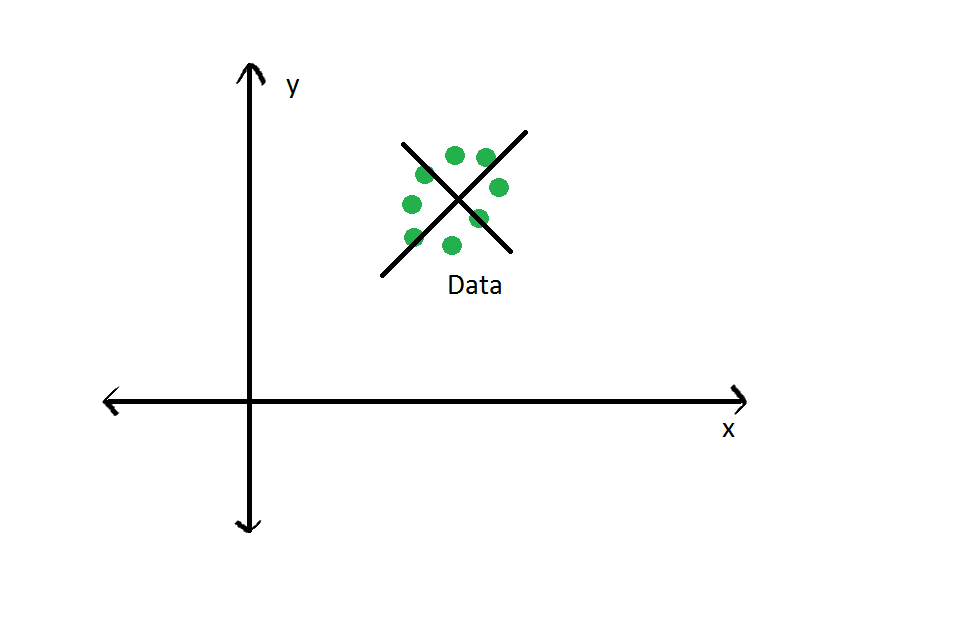



We are going to rotate our data to fit these new axes. But what will the coordinates of the rotated data be?
To convert the data into the new axes, we will multiply the original X, Y data by Eigenvectors, which indicate the direction of the new axes (principal components).
But first, we need to deduce the Eigenvectors (there are two — one per axis). Each Eigenvector will correspond to an Eigenvalue, whose magnitude indicates how much of the data’s variability is explained by its Eigenvector.
From the definition of Eigenvalue and Eigenvector:

[Covariance matrix].[Eigenvector] = [Eigenvalue].[Eigenvector]

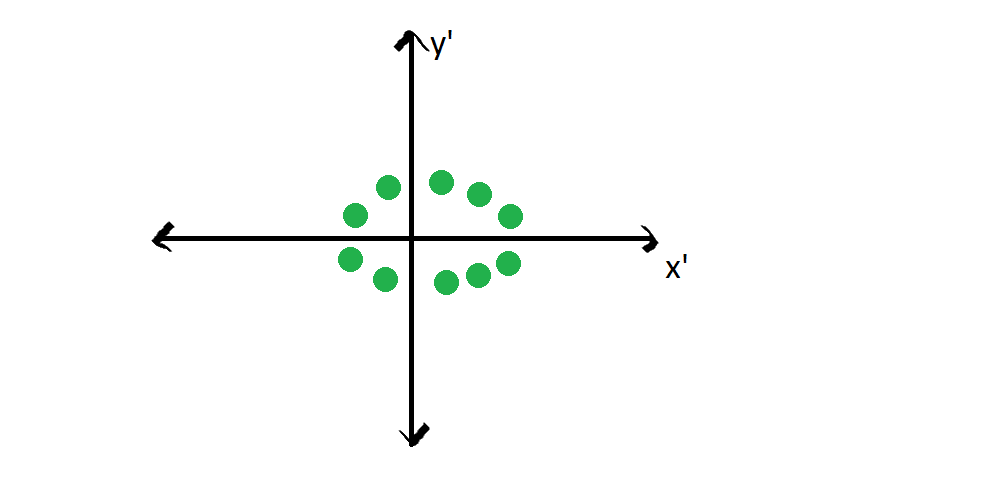
This figure shows New axes of the dataset when re-plotted with the PCA components.

Hope it helps you!!

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(df_cov_matrix)
print(eig_vecs)
print(eig_vals)

In [ ]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print("Eigenvalues in descending order:")
for i in eig_pairs:
 print(i[0])

In the below code, we are actually seeing the variance captured by each component, which is important because for PCA analysis we need to define the no of components we need, which comes from here if the variance values reaches above 95% in first 5 values, this means that first 5 components are enough for data to be plot on graph and thus the no of PCA components = 5

Let's find out this is in our case!! :)

In [ ]:
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is",var_exp)
print("Cumulative variance captured as we travel with each component",cum_var_exp)

For you people to understand, I have made a plot which shows the relation between no of components and the variance and we will easily find out that the components corresponding to the percentage.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pcs = pca.fit_transform(df_std)
df_new = pd.DataFrame(data=pcs, columns={"PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"})
df_new["target"] = df["label"]

In [ ]:
sns.lmplot(x='PC1',
           y='PC2',
           data=df_new,
           fit_reg=False,
           legend=True,
           size=9,
           hue='target',
           scatter_kws={"s":80})

As you can see above it shows the data in 2D but the probelm occurs that its is so clustred that we be able to segregate that which one is where if it is black and white. Is't it ???

# T-SNE(t- Distributed Stochastic Neighbour Embedding)

This is actually going to different world than the previous guys and here it is considered as most efficient way to perform the dimensionality reduction rather than any other. It performs such a great clustring of data which helps the person to visualize things very easily. :)

Well, I may use the same data as above, but i have shown you a different way of downloading data even if you know from where to start sklearn has libaray dataset which has many basic dataset which can be import just by one command.

The return_X_Y means to return the independent and dependent variable both and stored in data which will be like 

data=[independent variable, dependent variable] 

and thats why we give them name as pixel_value and target respectively.


In [ ]:
data = datasets.fetch_openml('mnist_784',version=1,return_X_y = True)
pixel_value, target = data
targets = target.astype(int)

Here, n_components defines the components and as we can visualize them well in a two- dimensional settings, we kept n_components =2

In [ ]:
tnse = manifold.TSNE(n_components=2,random_state = 42)
new_data = tnse.fit_transform(pixel_value[:3000,:])

In [ ]:
tnse_df = pd.DataFrame(np.column_stack((new_data,targets[:3000])),
                      columns = ["x","y","targets"])
tnse_df.loc[:,"targets"] = tnse_df.targets.astype(int)

In [ ]:
grid = sns.FacetGrid(tnse_df,hue="targets",size=8)
grid.map(plt.scatter,"x","y").add_legend()

# Powerful t-SNE
And now You see what a beautiful structure has came out to us. WOW!!!
## Conclusions:

Well from the graph its clearly visible that 

* 0(coloured blue are stacked at one place with no confusion among other numbers)

* 1(coloured orange is also very far from zero and a bit of purple which stand for 7, which is quite obvious)

* 2(coloured green is also having cluster aside with no confusion at all.)

* 3(coloured red is also differently placed with the interruption of brown which is of 5)

* 4 and 9 have been very mixed as they both looks same to computers, well sometime even humans make mistakes, its only a machine ;)

* 3 and 8 are also closely related with each others without any doubt this type of confusion is common.

* 6 has been stacked totally different without any confusion making our looks pretty and completes it

Hope that this kernel will add more knowledge to you and you will like it just like my other notebooks.

Thanks for your time, I hope I doesn't waste your time here :)

Happy learning ;)